# Computer Lab 1: Naive Models

In any forecasting study the first thing you need to do is create a naive benchmark.  We can use naive benchmarks as simple methods for producing forecasting or as a way to check that the more complicated models we will use later the course are worth the effort to use/maintain.

**In this practical will apply our knowledge in**

* Creating baseline naive forecasts
* Performing a train-test split
* Using forecast error metrics MAE and MAPE to select the best method 
* Producing prediction intervals for naive methods
* Analysing prediction intervals as part of model comparison.

---
**Before attempting the exercises, it is recommended that you watch the following code along tutorials that describes how to use python for basic forecasting**.

* **Reading time series data into pandas**:
    * Code along video (5 mins): https://bit.ly/pandas_ts
    * [Code along notebook](https://colab.research.google.com/github/health-data-science-OR/forecasting/blob/master/01_basics/01_code_along_notebooks/pandas_time_series.ipynb)
    
* **Benchmark models**:
    * Code along video (15 mins): https://bit.ly/benchmark_code_along
    * [Code along notebook](https://colab.research.google.com/github/health-data-science-OR/forecasting/blob/master/01_basics/01_code_along_notebooks/ca_benchmark_forecasts.ipynb)
    
---

# Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

# Install forecast-tools

In [2]:
# if running in Google Colab install forecast-tools
if 'google.colab' in sys.modules:
    !pip install forecast-tools

# forecast-tools imports

In [3]:
#baseline forecast methods
from forecast_tools.baseline import (
    Naive1, 
    SNaive,
    Drift,
    Average,
    baseline_estimators
)

from forecast_tools.metrics import(
    mean_absolute_percentage_error,
    mean_absolute_error,
    winkler_score,
    absolute_coverage_difference,
    coverage,
)

from forecast_tools.plotting import plot_time_series

# Helper functions

In [4]:
def preds_as_series(data, preds):
    '''
    Helper function for plotting predictions.
    Converts a numpy array of predictions to a 
    pandas.DataFrame with datetimeindex
    
    Parameters
    -----
    data - arraylike - the training data
    preds - numpy.array, vector of predictions 
    
    Returns:
    -------
    pandas.DataFrame
    '''
    start = pd.date_range(start=data.index.max(), periods=2, 
                          freq=data.index.freq).max()
    idx = pd.date_range(start=start, periods=len(preds), freq=data.index.freq)
    return pd.DataFrame(preds, index=idx)

## Exercise 1: Using Naive1 to forecast monthly outpatient appointments.

**Step 1: Import monthly outpatient appointments time series**  

This can be found in **"data/out_appoints_mth.csv"**
or 'https://raw.githubusercontent.com/health-data-science-OR/hpdm097-datasets/master/out_appoints_mth.csv'

* Hint: this is monthly data.  You can use the monthly Start ('MS') frequency

In [5]:
# your code here ...
url = 'https://raw.githubusercontent.com/health-data-science-OR/' \
        + 'hpdm097-datasets/master/out_appoints_mth.csv'

In [6]:
appoints = pd.read_csv(url, index_col='date', parse_dates=True, dayfirst=False)
appoints.index.freq = 'MS'

In [7]:
appoints.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2014-04-01 to 2018-04-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   out_apts  49 non-null     int64
dtypes: int64(1)
memory usage: 784.0 bytes


**Step 2 Plot the data**

In [8]:
# your code here ...

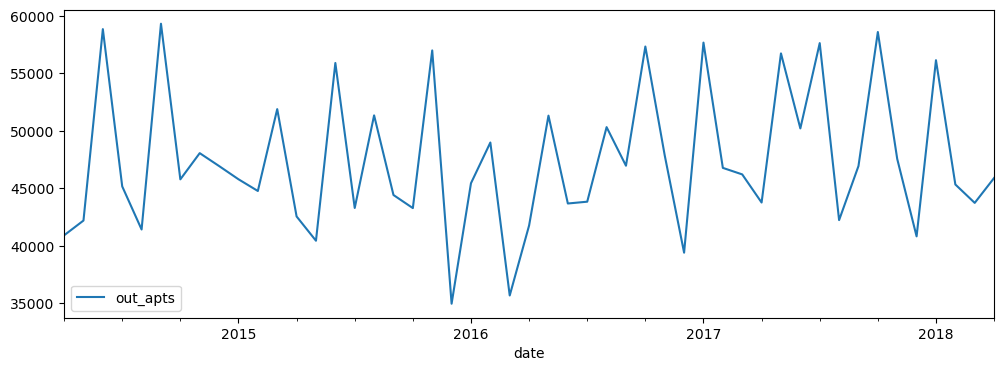

In [9]:
_ = appoints.plot(figsize=(12,4))

**Step 3: Create and fit Naive1 forecast model**

* Hint: you want to fit `appoints['out_apts']`

In [10]:
# your code here ...

In [11]:
nf1 = Naive1()
nf1.fit(appoints['out_apts'])

**Step 4: Plot the Naive1 fitted values**

All the baseline models have fitted values.  These are the in-sample prediction i.e. the predictions of the training data.

Once you have created and fitted a Naive1 model you can access the fitted values using the `.fittedvalues` property.  This returns a `DataFrame`.

Plot the fitted values against the observed data.

In [12]:
# your code here ...

<Axes: xlabel='date'>

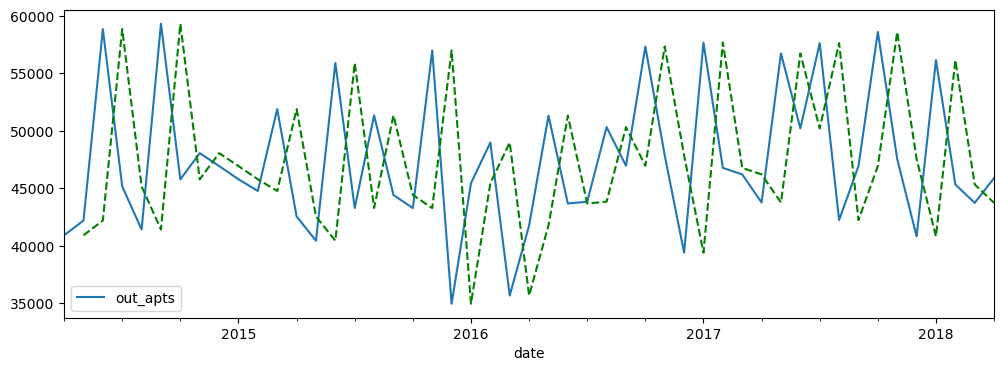

In [13]:
ax = appoints.plot(figsize=(12,4))
nf1.fittedvalues.plot(ax=ax, color='green', linestyle='--')

**Step 5: Forecast the next 6 months**

After you have created a forecast plot the predictions.  

* Hint: use the `pred_as_series()` method to plot the predictions.  See the lecture notes for exampes of how to use it.

In [14]:
# your code here ...

In [15]:
preds = nf1.predict(horizon=6)

In [16]:
preds = preds_as_series(appoints, preds)

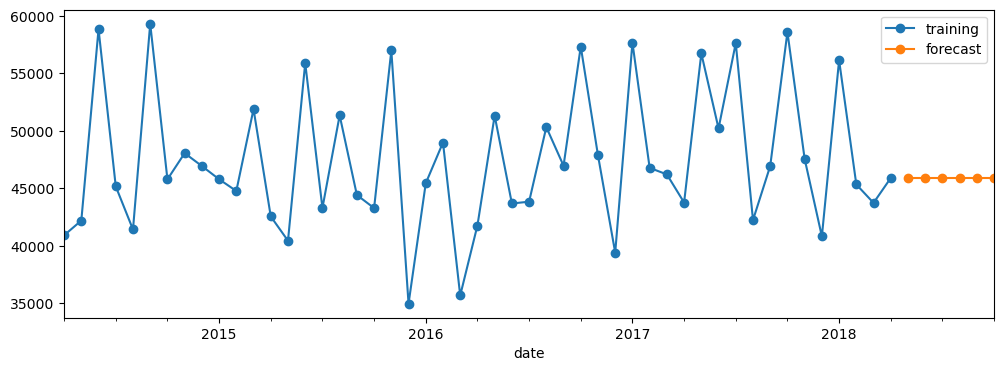

In [17]:
ax = appoints.plot(figsize=(12,4), marker='o')
preds.plot(ax=ax, marker='o')
_ = ax.legend(['training', 'forecast'])

## Exercise 2. Choose the best baseline forecast method for ED reattendances

**Step 1: Import emergency department reattendance data.**  

This is a time series from a hospital that measures the number of patients per month that have reattended an ED within 7 days of a previous attendance.

This can be found in **"ed_reattend.csv"**:  
'https://raw.githubusercontent.com/health-data-science-OR/hpdm097-datasets/master/ed_reattend.csv'

* Hint 1: The format of the 'date' column is in UK standard dd/mm/yyyy.  You will need to set the `dayfirst=True` of `pd.read_csv()` to make sure pandas interprets the dates correctly.

* Hint 2: The data is monthly and the dates are all the first day of the month.  This is called monthly start and its shorthand is 'MS'

In [18]:
# your code here ...
url = 'https://raw.githubusercontent.com/health-data-science-OR/' \
       + 'hpdm097-datasets/master/ed_reattend.csv'

In [19]:
reattends = pd.read_csv(url, index_col='date',  parse_dates=True, dayfirst=True)
reattends.index.freq = 'MS'

**Step 2: Perform a calender adjustment**

In [20]:
#your code here ...

In [21]:
reattend_rate = reattends['reattends'] / reattends.index.days_in_month

**Step 3: Perform a train-test split**

Create a train test split where you holdback the final 6 months of the data.

Remember to work with the calender adjusted data.

* Hint: The test set is the last 6 rows in your pandas DataFrame

In [22]:
#your code here ...

In [23]:
#train test split
train = reattend_rate.iloc[:-6]
test = reattend_rate.iloc[-6:]

In [24]:
train.shape

(37,)

In [25]:
test.shape

(6,)

**Step 4: Plot the TRAINING data**

Remember don't look at the test data just yet.  You don't want to bias your model selection process.

In [26]:
# your code here ...

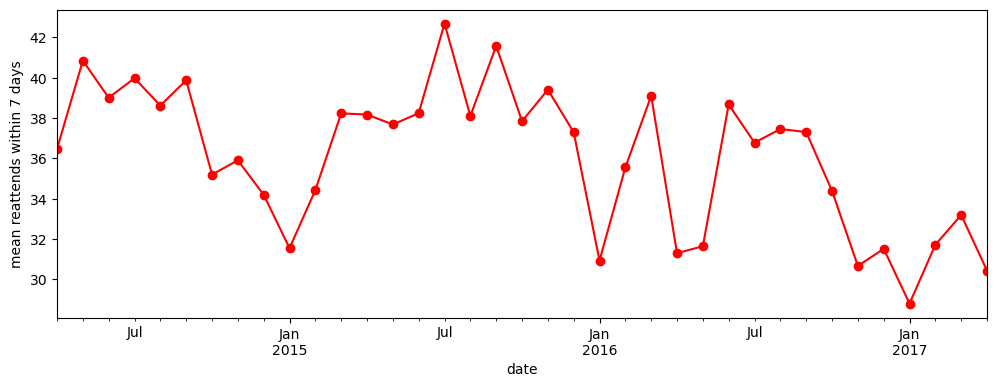

In [27]:
ax = train.plot(figsize=(12,4), color='red', marker='o', legend=False)
_ = ax.set_ylabel('mean reattends within 7 days')

**Step 5: Create and fit Naive1, and SNaive baseline models**

* Hint: Fit the TRAINING data.

In [28]:
# your code here ...

In [29]:
model_1 = Naive1()
model_2 = SNaive(12)

In [30]:
model_1.fit(train)
model_2.fit(train)

**Step 6: Use each model to predict 6 months ahead**

* Hint.  You need to store the prediction results so that later on you can calculate the forecast error.

In [31]:
# your code here ...

In [32]:
preds_1 = model_1.predict(horizon=6)
preds_2 = model_2.predict(horizon=6)

**Step 7: Calculate the mean absolute error of each forecast method**
    
Based on the results which method would you choose?

In [33]:
# your code here ...

In [34]:
mae_1 = mean_absolute_error(y_true=test, y_pred=preds_1)
mae_2 = mean_absolute_error(y_true=test, y_pred=preds_2)

print(mae_1)
print(mae_2)

2.0378136200716845
7.141218637992831


**Step 8: Produce 80 and 95% prediction intervals for the model 1.**

In [35]:
#your code here ...

In [36]:
y_preds, y_intervals = model_1.predict(horizon=6, return_predict_int=True, 
                                       alpha=[0.2, 0.05])

In [37]:
# cast 80% intervals array to dataframe and name columns
intervals_80 = pd.DataFrame(
    y_intervals[0], index=test.index, columns=["lower", "upper"]
)

intervals_80.round(1)

,lower,upper
date,,
2017-05-01,26.2,34.7
2017-06-01,24.4,36.4
2017-07-01,23.1,37.8
2017-08-01,22.0,38.9
2017-09-01,21.0,39.9
2017-10-01,20.1,40.8


In [38]:
# cast 80% intervals array to dataframe and name columns
intervals_95 = pd.DataFrame(
    y_intervals[1], index=test.index, columns=["lower", "upper"]
)

intervals_95.round(1)

,lower,upper
date,,
2017-05-01,24.0,36.9
2017-06-01,21.3,39.6
2017-07-01,19.2,41.7
2017-08-01,17.5,43.4
2017-09-01,16.0,44.9
2017-10-01,14.6,46.3


**Step 9: Produce 80 and 95% prediction intervals for the model 2**

* Does the shape of the prediction intervals alter your model selection?

In [39]:
y_preds2, y_intervals2 = model_2.predict(horizon=6, return_predict_int=True, 
                                          alpha=[0.2, 0.05])

# cast 80% intervals array to dataframe and name columns
intervals2_80 = pd.DataFrame(
    y_intervals2[0], index=test.index, columns=["lower", "upper"]
)

# cast 95% intervals array to dataframe and name columns
intervals2_95 = pd.DataFrame(
    y_intervals2[1], index=test.index, columns=["lower", "upper"]
)

intervals2_80.round(1)

,lower,upper
date,,
2017-05-01,26.7,36.6
2017-06-01,33.7,43.6
2017-07-01,31.9,41.7
2017-08-01,32.5,42.4
2017-09-01,32.4,42.2
2017-10-01,29.5,39.3


In [40]:
intervals2_95.round(1)

,lower,upper
date,,
2017-05-01,24.1,39.2
2017-06-01,31.1,46.2
2017-07-01,29.2,44.3
2017-08-01,29.9,45.0
2017-09-01,29.8,44.8
2017-10-01,26.9,41.9


**Step 10: Visualise the prediction intervals for both models**

This is only practical when you have a small number of time series and models.  

In [41]:
# model 1
_ = plot_time_series(
    training_data = pd.DataFrame(train),
    test_data = pd.DataFrame(test),
    forecast = pd.DataFrame(y_preds, index=test.index),
    prediction_intervals = {"95% PI": intervals_95, "80% PI": intervals_80},
    y_axis_label="Reattendances",
)

In [42]:
# model 2
_ = plot_time_series(
    training_data = pd.DataFrame(train),
    test_data = pd.DataFrame(test),
    forecast = pd.DataFrame(y_preds2, index=test.index),
    prediction_intervals = {"95% PI": intervals2_95, "80% PI": intervals2_80},
    y_axis_label="Reattendances",
)

**Step 11: Calculate prediction interval metrics for 80% intervals**

* Here we will calculate the Winkler score, absolute coverage difference, and empirical coverage
* Do the results alter your decision?
* Which measure(s) were the most useful for this time series?

In [43]:
winkler_1 = winkler_score(y_true=test, intervals=y_intervals[0], alpha=0.2)
winkler_2 = winkler_score(y_true=test, intervals=y_intervals2[0], alpha=0.2)
print(round(winkler_1, 2))
print(round(winkler_2, 2))

15.29
36.56


In [44]:
coverage_diff1 = absolute_coverage_difference(y_true=test, intervals=y_intervals[0])
coverage_diff2 = absolute_coverage_difference(y_true=test, intervals=y_intervals2[0])
print(round(coverage_diff1, 2))
print(round(coverage_diff2, 2))

0.05
0.62


In [45]:
cover1 = coverage(y_true=test, pred_intervals=y_intervals[0])
cover2 = coverage(y_true=test, pred_intervals=y_intervals2[0])
print(round(cover1, 2))
print(round(cover1, 2))

1.0
1.0


## End